In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Mounted at /content/drive
/
/content/drive/MyDrive


Part I: Data analysis, ML models & PyTorch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.impute import SimpleImputer



# Step 1: Data analysis & Pre-processing

In [ ]:
dataset_loc = '/content/drive/MyDrive/Sem 2/DL/Assignment 0/Crime_Data_from_2020_to_Present.csv'
dataset = pd.read_csv(dataset_loc)
display(dataset)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883982,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
883983,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,Hollywood,647,2,901,VIOLATION OF RESTRAINING ORDER,...,IC,Invest Cont,901.0,NaN,NaN,NaN,1500 N BRONSON AV,NaN,34.0980,-118.3180
883984,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
883985,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [ ]:
# Main statistics of the data
display(dataset.describe())
print(dataset.columns)
print(dataset.shape)
print(dataset.index)
display(dataset.info())
display(dataset['Crm Cd Desc'].unique())

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.839870e+05,883987.000000,883987.000000,883987.000000,883987.000000,883987.000000,883987.000000,883977.000000,306604.000000,883976.000000,64497.000000,2176.000000,62.000000,883987.000000,883987.000000
mean,2.173618e+08,1336.560971,10.703108,1116.747620,1.411516,500.758133,29.660630,306.299510,363.322520,500.499365,957.820379,983.770221,990.983871,33.986470,-118.051153
std,1.139578e+07,653.232813,6.100755,610.076564,0.492109,207.629796,21.825831,217.174128,123.705678,207.419239,110.885829,52.538656,27.477259,1.725364,5.981531
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.103145e+08,900.000000,6.000000,615.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.014300,-118.429700
50%,2.203222e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321500
75%,2.302216e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163500,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
(883987, 28)
RangeIndex(start=0, stop=883987, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883987 entries, 0 to 883986
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           883987 non-null  int64  
 1   Date Rptd       883987 non-null  object 
 2   DATE OCC        883987 non-null  object 
 3   TIME OCC        883987 non-null  int64  
 4   AREA            883987 non-null  int64  
 5   AREA NAME       883987 non-null  object 
 6   Rpt Dist No     883987 non-null  int64  
 7   Part 

None

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',

In [ ]:
# handling missing values in categorical data
imputer = SimpleImputer(strategy='mean')
dataset['Cross Street'].fillna('Unknown', inplace=True)


In [ ]:
# Handle mismatched string formats
dataset['Crm Cd Desc'] = dataset['Crm Cd Desc'].str.lower()
dataset['Vict Sex'] = dataset['Vict Sex'].str.lower()
dataset['Vict Descent'] = dataset['Vict Descent'].str.lower()
dataset['Premis Desc'] = dataset['Premis Desc'].str.lower()
dataset['Weapon Desc'] = dataset['Weapon Desc'].str.lower()
dataset['Status'] = dataset['Status'].str.lower()
dataset['Status Desc'] = dataset['Status Desc'].str.lower()
dataset['LOCATION'] = dataset['LOCATION'].str.lower()
dataset['Cross Street'] = dataset['Cross Street'].str.lower()
display(dataset)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,vehicle - stolen,...,aa,adult arrest,510.0,998.0,NaN,NaN,1900 s longwood av,unknown,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,burglary from vehicle,...,ic,invest cont,330.0,998.0,NaN,NaN,1000 s flower st,unknown,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,bike - stolen,...,ic,invest cont,480.0,NaN,NaN,NaN,1400 w 37th st,unknown,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,shoplifting-grand theft ($950.01 & over),...,ic,invest cont,343.0,NaN,NaN,NaN,14000 riverside dr,unknown,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,theft of identity,...,ic,invest cont,354.0,NaN,NaN,NaN,1900 transient,unknown,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883982,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"assault with deadly weapon, aggravated assault",...,ic,invest cont,230.0,NaN,NaN,NaN,6100 s vermont av,unknown,33.9841,-118.2915
883983,230618716,12/07/2023 12:00:00 AM,12/01/2023 12:00:00 AM,1000,6,Hollywood,647,2,901,violation of restraining order,...,ic,invest cont,901.0,NaN,NaN,NaN,1500 n bronson av,unknown,34.0980,-118.3180
883984,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,pickpocket,...,ic,invest cont,352.0,NaN,NaN,NaN,500 s main st,unknown,34.0467,-118.2485
883985,230906458,03/05/2023 12:00:00 AM,03/05/2023 12:00:00 AM,900,9,Van Nuys,914,2,745,vandalism - misdeameanor ($399 or under),...,ic,invest cont,745.0,NaN,NaN,NaN,14500 hartland st,unknown,34.1951,-118.4487


In [ ]:
crm_cd_counts = dataset['Crm Cd'].value_counts()
print(crm_cd_counts.head(10))


510    94923
624    70311
354    54937
330    54536
310    54076
740    53635
230    50464
440    45126
626    44137
420    33997
Name: Crm Cd, dtype: int64


In [ ]:
# Top 10 classes taken from the entire dataset
top_10_crm_cd = crm_cd_counts.head(10).index.to_list()
filtered_dataset = dataset[dataset['Crm Cd'].isin(top_10_crm_cd)]
display(filtered_dataset)



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,vehicle - stolen,...,aa,adult arrest,510.0,998.0,NaN,NaN,1900 s longwood av,unknown,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,burglary from vehicle,...,ic,invest cont,330.0,998.0,NaN,NaN,1000 s flower st,unknown,34.0444,-118.2628
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,theft of identity,...,ic,invest cont,354.0,NaN,NaN,NaN,1900 transient,unknown,34.0944,-118.3277
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,theft of identity,...,ic,invest cont,354.0,NaN,NaN,NaN,9900 compton av,unknown,33.9467,-118.2463
6,230110144,04/04/2023 12:00:00 AM,07/03/2020 12:00:00 AM,900,1,Central,182,2,354,theft of identity,...,ic,invest cont,354.0,NaN,NaN,NaN,1100 s grand av,unknown,34.0415,-118.2620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883976,241505232,01/24/2024 12:00:00 AM,01/24/2023 12:00:00 AM,2200,15,N Hollywood,1585,2,626,intimate partner - simple assault,...,ic,invest cont,626.0,NaN,NaN,NaN,vineland,bluffside,34.1420,-118.3702
883979,230115595,07/08/2023 12:00:00 AM,07/08/2023 12:00:00 AM,1230,1,Central,111,2,626,intimate partner - simple assault,...,ao,adult other,626.0,NaN,NaN,NaN,800 bartlett st,unknown,34.0626,-118.2445
883980,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"vandalism - felony ($400 & over, all church va...",...,ic,invest cont,740.0,NaN,NaN,NaN,12500 branford st,unknown,34.2466,-118.4054
883981,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"assault with deadly weapon, aggravated assault",...,ic,invest cont,230.0,NaN,NaN,NaN,12800 filmore st,unknown,34.2790,-118.4116


In [ ]:
crm_cd_counts = dataset['Status Desc'].value_counts()
print(crm_cd_counts.head)


<bound method NDFrame.head of invest cont     707685
adult other      95157
adult arrest     76719
juv arrest        2869
juv other         1553
unk                  4
Name: Status Desc, dtype: int64>


In [ ]:
# feature selection
# selected_columns = ['TIME OCC', 'AREA', 'Rpt Dist No',
#                     'Crm Cd', 'Mocodes', 'Vict Age',
#                     'Vict Sex', 'Vict Descent', 'Premis Cd',
#                     'Weapon Used Cd', 'Status', 'Cross Street', 'LAT', 'LON']

selected_columns = ['TIME OCC', 'AREA',
                    'Crm Cd', 'Mocodes', 'Vict Age',
                    'Vict Sex', 'Vict Descent', 'Premis Cd',
                    'Weapon Used Cd', 'Status', 'Cross Street']#, 'LAT', 'LON']

filtered_dataset = filtered_dataset[selected_columns]
display(filtered_dataset)


,TIME OCC,AREA,Crm Cd,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Cross Street
0,2130,7,510,NaN,0,m,o,101.0,NaN,aa,unknown
1,1800,1,330,1822 1402 0344,47,m,o,128.0,NaN,ic,unknown
4,1200,6,354,1822 1501 0930 2004,28,m,h,102.0,NaN,ic,unknown
5,2300,18,354,1822 0100 0930 0929,41,m,h,501.0,NaN,ic,unknown
6,900,1,354,0930 0929,25,m,h,502.0,NaN,ic,unknown
...,...,...,...,...,...,...,...,...,...,...,...
883976,2200,15,626,2000 1218 1814 0417,29,f,w,102.0,400.0,ic,bluffside
883979,1230,1,626,0448 0913 1813 2000,35,m,w,501.0,400.0,ao,unknown
883980,1800,16,740,1300 0329,23,m,h,122.0,NaN,ic,unknown
883981,1000,16,230,0416 0411 1822,25,f,h,102.0,400.0,ic,unknown


In [ ]:
# handling categorical data
from sklearn.preprocessing import LabelEncoder

# Categorical columns
categorical_columns = ['Vict Sex', 'Vict Descent', 'Status', 'Cross Street']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    filtered_dataset[col] = label_encoders[col].fit_transform(filtered_dataset[col])

display(filtered_dataset)

,TIME OCC,AREA,Crm Cd,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Cross Street
0,2130,7,510,NaN,0,3,12,101.0,NaN,0,7370
1,1800,1,330,1822 1402 0344,47,3,12,128.0,NaN,3,7370
4,1200,6,354,1822 1501 0930 2004,28,3,7,102.0,NaN,3,7370
5,2300,18,354,1822 0100 0930 0929,41,3,7,501.0,NaN,3,7370
6,900,1,354,0930 0929,25,3,7,502.0,NaN,3,7370
...,...,...,...,...,...,...,...,...,...,...,...
883976,2200,15,626,2000 1218 1814 0417,29,1,17,102.0,400.0,3,1222
883979,1230,1,626,0448 0913 1813 2000,35,3,17,501.0,400.0,1,7370
883980,1800,16,740,1300 0329,23,3,7,122.0,NaN,3,7370
883981,1000,16,230,0416 0411 1822,25,1,7,102.0,400.0,3,7370


In [ ]:
filtered_dataset_cleaned = filtered_dataset.dropna()
display(filtered_dataset_cleaned)

,TIME OCC,AREA,Crm Cd,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Cross Street
9,1220,19,624,0416,26,3,7,502.0,400.0,3,7370
19,1800,7,230,1309 0400,31,1,12,101.0,307.0,0,7370
31,1630,8,624,2000 1813 0913 0416,24,1,12,501.0,400.0,3,7370
49,430,6,310,1822 1607 0216 0344,-2,4,18,203.0,500.0,3,7370
66,2100,8,626,1814 0913 0400,42,1,7,501.0,400.0,3,7370
...,...,...,...,...,...,...,...,...,...,...,...
883958,2245,4,624,0400 0416 0913,58,1,7,504.0,400.0,1,7370
883976,2200,15,626,2000 1218 1814 0417,29,1,17,102.0,400.0,3,1222
883979,1230,1,626,0448 0913 1813 2000,35,3,17,501.0,400.0,1,7370
883981,1000,16,230,0416 0411 1822,25,1,7,102.0,400.0,3,7370


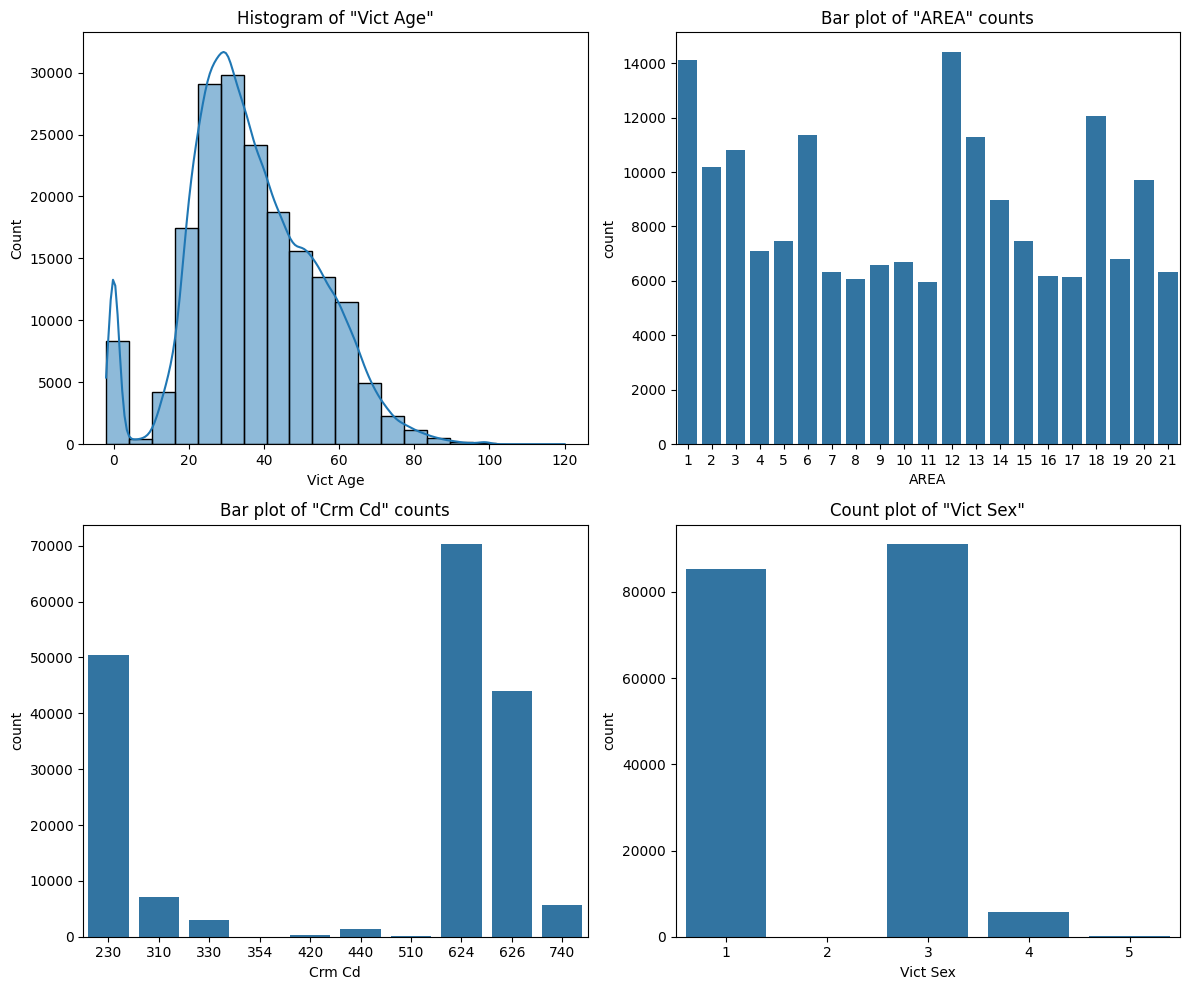

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))

# Histogram of "Vict Age"
plt.subplot(2, 2, 1)
sns.histplot(filtered_dataset_cleaned['Vict Age'], bins=20, kde=True)
plt.title('Histogram of "Vict Age"')

# Bar plot of "AREA" counts
plt.subplot(2, 2, 2)
sns.countplot(x='AREA', data=filtered_dataset_cleaned)
plt.title('Bar plot of "AREA" counts')

# Bar plot of "Crm Cd" counts
plt.subplot(2, 2, 3)
sns.countplot(x='Crm Cd', data=filtered_dataset_cleaned)
plt.title('Bar plot of "Crm Cd" counts')

# Count plot of "Vict Sex"
plt.subplot(2, 2, 4)
sns.countplot(x='Vict Sex', data=filtered_dataset_cleaned)
plt.title('Count plot of "Vict Sex"')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['TIME OCC']#, 'LAT', 'LON']
scaler = MinMaxScaler()

filtered_dataset_cleaned[columns_to_normalize] = scaler.fit_transform(filtered_dataset_cleaned[columns_to_normalize])

print("Normalized DataFrame:")
print(filtered_dataset_cleaned)


Normalized DataFrame:
        TIME OCC  AREA  Crm Cd              Mocodes  Vict Age  Vict Sex  \
9       0.516964    19     624                 0416        26         3   
19      0.762935     7     230            1309 0400        31         1   
31      0.690840     8     624  2000 1813 0913 0416        24         1   
49      0.181934     6     310  1822 1607 0216 0344        -2         4   
66      0.890161     8     626       1814 0913 0400        42         1   
...          ...   ...     ...                  ...       ...       ...   
883958  0.951654     4     624       0400 0416 0913        58         1   
883976  0.932570    15     626  2000 1218 1814 0417        29         1   
883979  0.521204     1     626  0448 0913 1813 2000        35         3   
883981  0.423664    16     230       0416 0411 1822        25         1   
883982  0.690840    12     230  0601 0445 0416 0359        29         3   

        Vict Descent  Premis Cd  Weapon Used Cd  Status  Cross Street  
9    

<ipython-input-14-4394422d054d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset_cleaned[columns_to_normalize] = scaler.fit_transform(filtered_dataset_cleaned[columns_to_normalize])


<ipython-input-15-55e7aa1b692e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_dataset_cleaned[selected_columns].corr()


,TIME OCC,AREA,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Cross Street
TIME OCC,1.000000,0.026019,0.010179,0.021077,-0.009493,-0.011962,-0.011163,-0.008692,0.000029,-0.002411
AREA,0.026019,1.000000,-0.005312,-0.000546,-0.049001,0.001001,0.008529,-0.024550,-0.054504,0.029278
Crm Cd,0.010179,-0.005312,1.000000,0.025047,-0.261635,0.009806,0.234805,0.473749,-0.034719,0.140481
Vict Age,0.021077,-0.000546,0.025047,1.000000,-0.067087,-0.044478,0.042285,0.084383,-0.028992,0.016477
Vict Sex,-0.009493,-0.049001,-0.261635,-0.067087,1.000000,0.177137,-0.145095,-0.145244,0.092999,-0.049003
Vict Descent,-0.011962,0.001001,0.009806,-0.044478,0.177137,1.000000,0.004272,0.101263,0.004725,0.050374
Premis Cd,-0.011163,0.008529,0.234805,0.042285,-0.145095,0.004272,1.000000,0.202600,-0.128110,0.301796
Weapon Used Cd,-0.008692,-0.024550,0.473749,0.084383,-0.145244,0.101263,0.202600,1.000000,0.015616,0.150842
Status,0.000029,-0.054504,-0.034719,-0.028992,0.092999,0.004725,-0.128110,0.015616,1.000000,-0.084195
Cross Street,-0.002411,0.029278,0.140481,0.016477,-0.049003,0.050374,0.301796,0.150842,-0.084195,1.000000


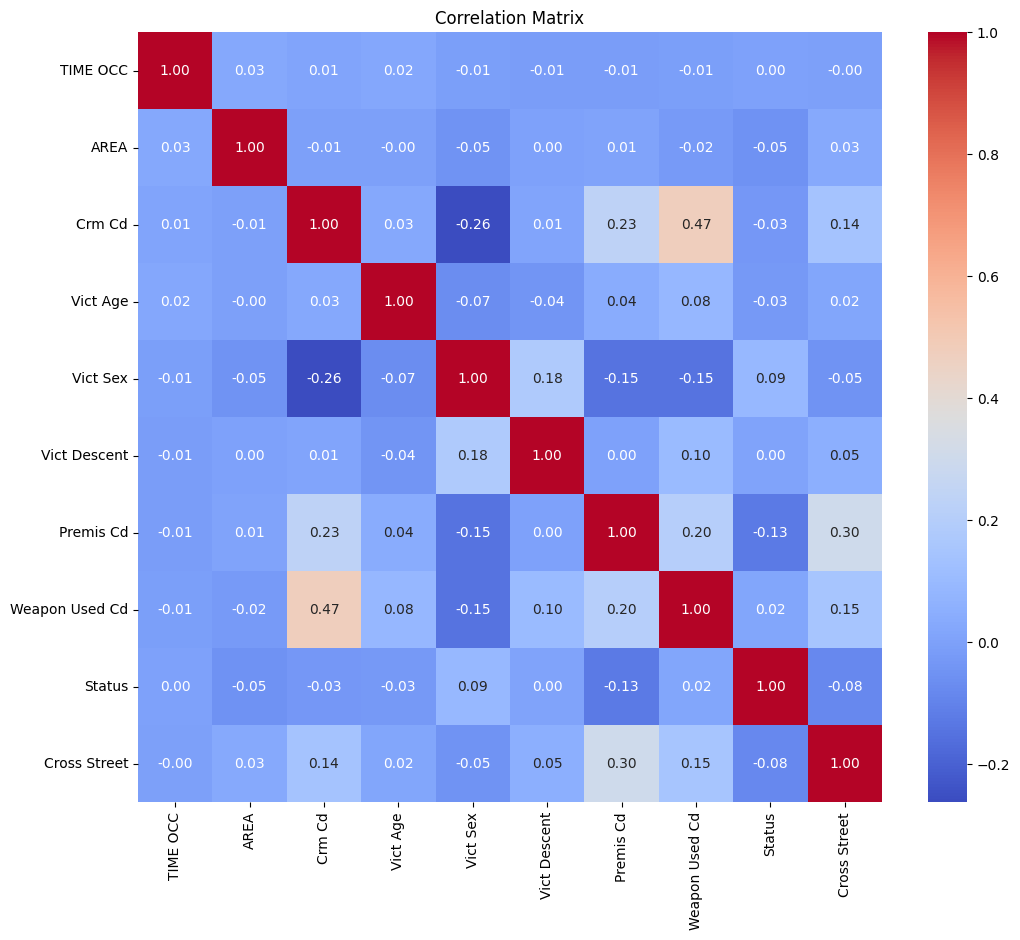

In [ ]:
correlation_matrix = filtered_dataset_cleaned[selected_columns].corr()

display(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

target_variable = 'Crm Cd'
# features = ['TIME OCC', 'AREA', 'Rpt Dist No',
#             'Vict Age','Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd','Status', 'Cross Street', 'LAT', 'LON']
features = ['TIME OCC', 'AREA',
            'Vict Age','Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd','Status', 'Cross Street']#, 'LAT', 'LON']

X = filtered_dataset_cleaned[features]
y = filtered_dataset_cleaned[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)


X_train shape: (109198, 9)
y_train shape: (109198,)
X_test shape: (36400, 9)
y_test shape: (36400,)
X_validation shape: (36400, 9)
y_validation shape: (36400,)


#  Step 2: ML Models

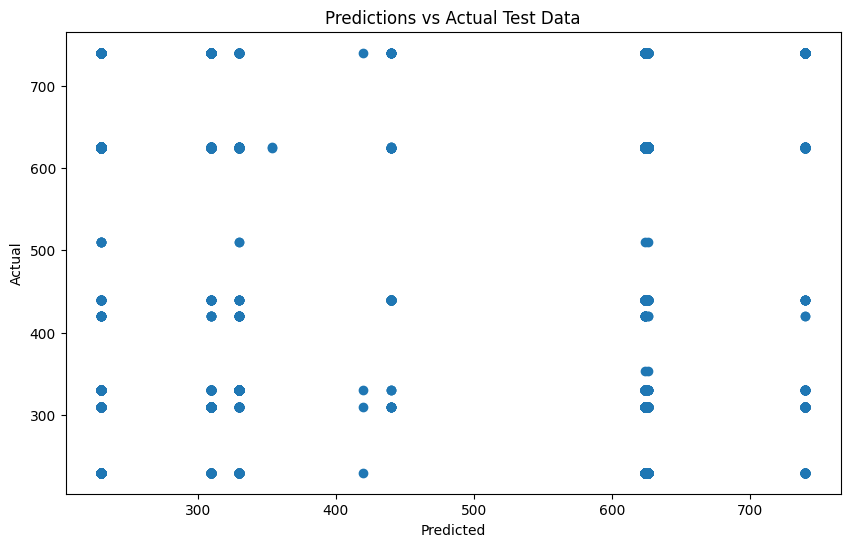

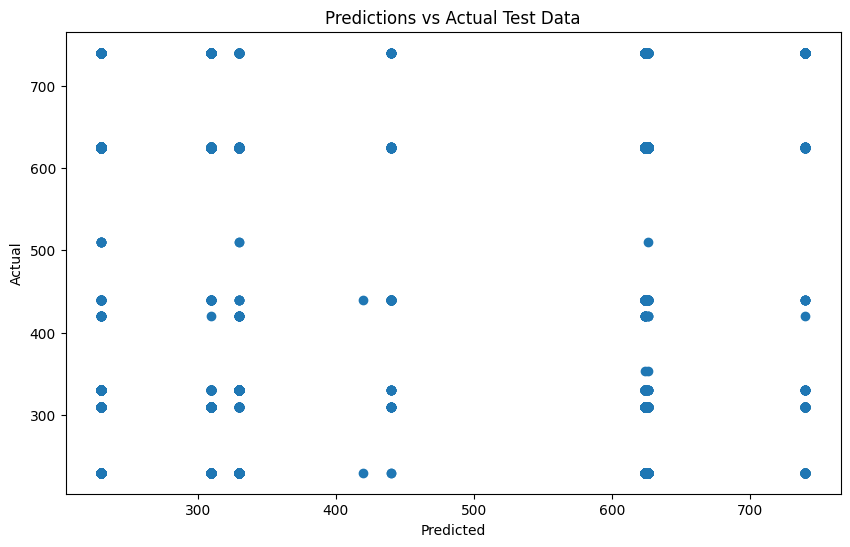

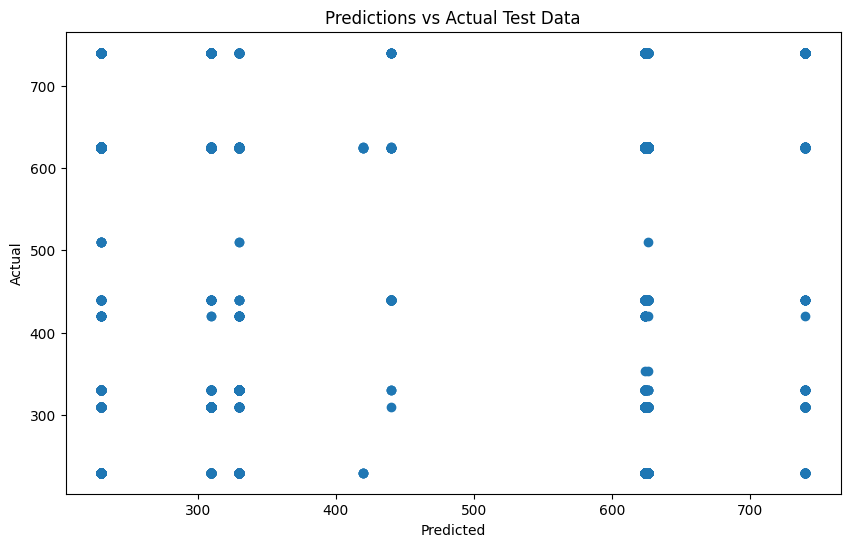

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, log_loss

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
}

f1_scores = {}

# Train and evaluate each classifier
accuracies = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Predictions vs Actual Test Data")
    plt.show()



In [ ]:
print(accuracies)
print(f1_scores)

{'Random Forest': 0.7193956043956043, 'K-Nearest Neighbors': 0.6775, 'Gradient Boosting': 0.7342857142857143}
{'Random Forest': 0.7165092774037624, 'K-Nearest Neighbors': 0.6709643316807943, 'Gradient Boosting': 0.7317708507176823}


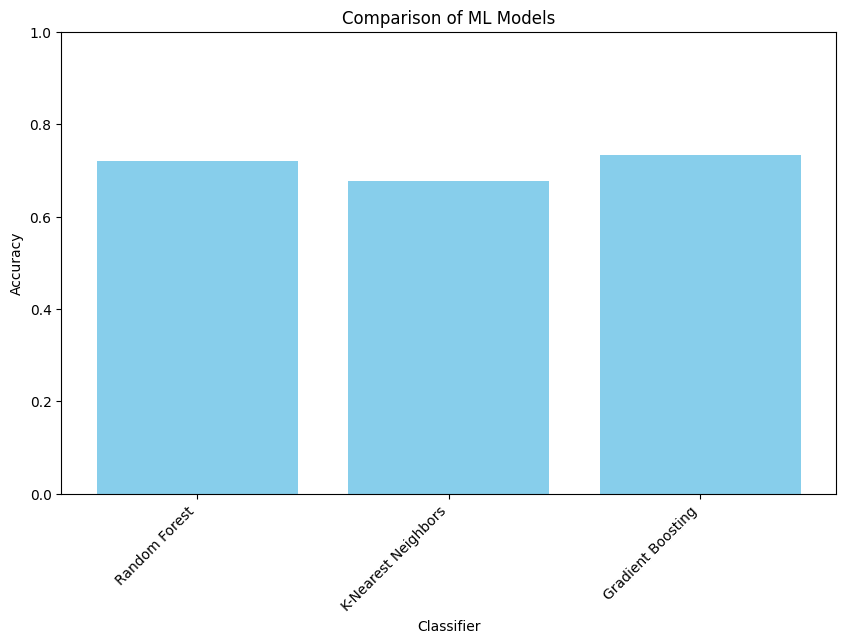

In [ ]:
# Step 2: Comparison of Results
# Plot the accuracy scores

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Models')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.show()

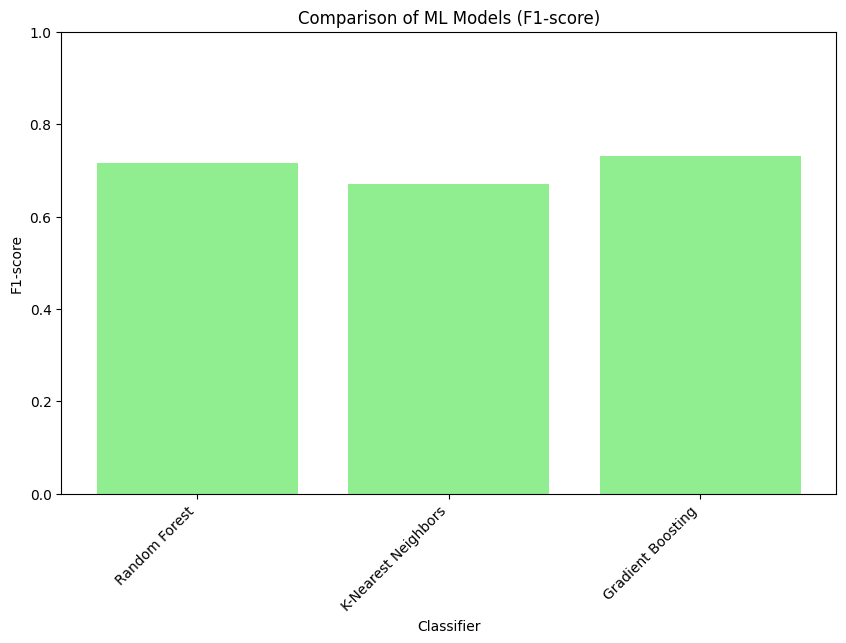

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='lightgreen')
plt.xlabel('Classifier')
plt.ylabel('F1-score')
plt.title('Comparison of ML Models (F1-score)')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.show()


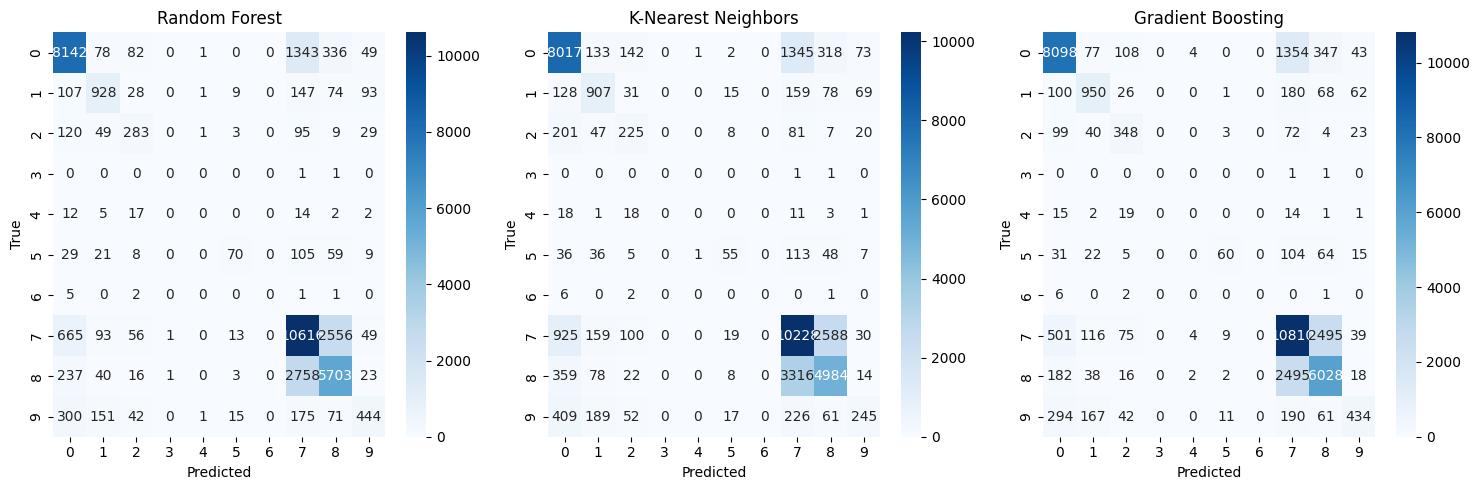

In [ ]:
from sklearn.metrics import confusion_matrix

# Dictionary to store confusion matrices
confusion_matrices = {}

# Plot confusion matrices
fig, axs = plt.subplots(1, len(classifiers), figsize=(15, 5))

for i, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')

plt.tight_layout()
plt.show()

# # Analyze results
# for name, metrics in results.items():
#     print(f"\n{name} Results:")
#     print("Accuracy:", metrics['accuracy'])
#     print("F1 Score:", metrics['f1_score'])
#     print("Log Loss:", metrics['loss'])



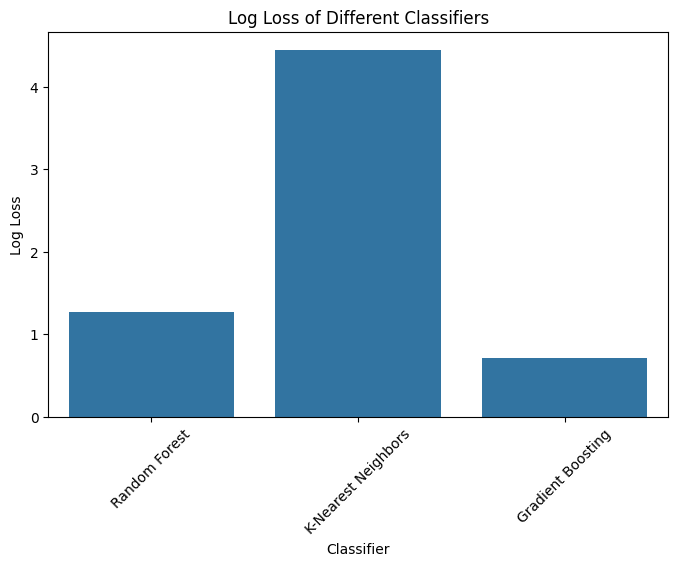

In [ ]:
import seaborn as sns

loss_values = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)
    loss = log_loss(y_test, y_pred_proba)
    loss_values[name] = loss

plt.figure(figsize=(8, 5))
sns.barplot(x=list(loss_values.keys()), y=list(loss_values.values()))
plt.xlabel("Classifier")
plt.ylabel("Log Loss")
plt.title("Log Loss of Different Classifiers")
plt.xticks(rotation=45)
plt.show()


In [ ]:
y.unique()

array([624, 230, 310, 626, 330, 740, 420, 440, 354, 510])

#Step 3: Pytorch Shallow Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class NN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out



# class NN(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(NN, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.relu(out)
#         out = self.fc2(out)
#         return out

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.long)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_tensor)

y_encoded_tensor = torch.tensor(y_encoded, dtype=torch.long)

input_size = X.shape[1]
hidden_size1 = 64
hidden_size2 = 24
num_classes = 10

model = NN(input_size, hidden_size1, hidden_size2, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)
loss_history = []

num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_encoded_tensor)
    loss_history.append(loss)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/2000], Loss: 1.4166
Epoch [200/2000], Loss: 1.4164
Epoch [300/2000], Loss: 1.4164
Epoch [400/2000], Loss: 1.4164
Epoch [500/2000], Loss: 1.4164
Epoch [600/2000], Loss: 1.4164
Epoch [700/2000], Loss: 1.4164
Epoch [800/2000], Loss: 1.4164
Epoch [900/2000], Loss: 1.4164
Epoch [1000/2000], Loss: 1.4164
Epoch [1100/2000], Loss: 1.4164
Epoch [1200/2000], Loss: 1.4164
Epoch [1300/2000], Loss: 1.4164
Epoch [1400/2000], Loss: 1.4164
Epoch [1500/2000], Loss: 1.4164
Epoch [1600/2000], Loss: 1.4164
Epoch [1700/2000], Loss: 1.4164
Epoch [1800/2000], Loss: 1.4164
Epoch [1900/2000], Loss: 1.4164
Epoch [2000/2000], Loss: 1.4164


In [ ]:
print(loss_history)

[tensor(367.0053, grad_fn=<NllLossBackward0>), tensor(1208.3979, grad_fn=<NllLossBackward0>), tensor(2165.8276, grad_fn=<NllLossBackward0>), tensor(1144.7003, grad_fn=<NllLossBackward0>), tensor(510.9566, grad_fn=<NllLossBackward0>), tensor(374.0273, grad_fn=<NllLossBackward0>), tensor(57.2481, grad_fn=<NllLossBackward0>), tensor(2.2182, grad_fn=<NllLossBackward0>), tensor(2.1707, grad_fn=<NllLossBackward0>), tensor(2.1076, grad_fn=<NllLossBackward0>), tensor(2.0323, grad_fn=<NllLossBackward0>), tensor(1.9489, grad_fn=<NllLossBackward0>), tensor(1.8634, grad_fn=<NllLossBackward0>), tensor(1.7799, grad_fn=<NllLossBackward0>), tensor(1.7041, grad_fn=<NllLossBackward0>), tensor(1.6383, grad_fn=<NllLossBackward0>), tensor(1.5798, grad_fn=<NllLossBackward0>), tensor(1.5291, grad_fn=<NllLossBackward0>), tensor(1.4874, grad_fn=<NllLossBackward0>), tensor(1.4594, grad_fn=<NllLossBackward0>), tensor(1.4506, grad_fn=<NllLossBackward0>), tensor(1.4611, grad_fn=<NllLossBackward0>), tensor(1.4796, 

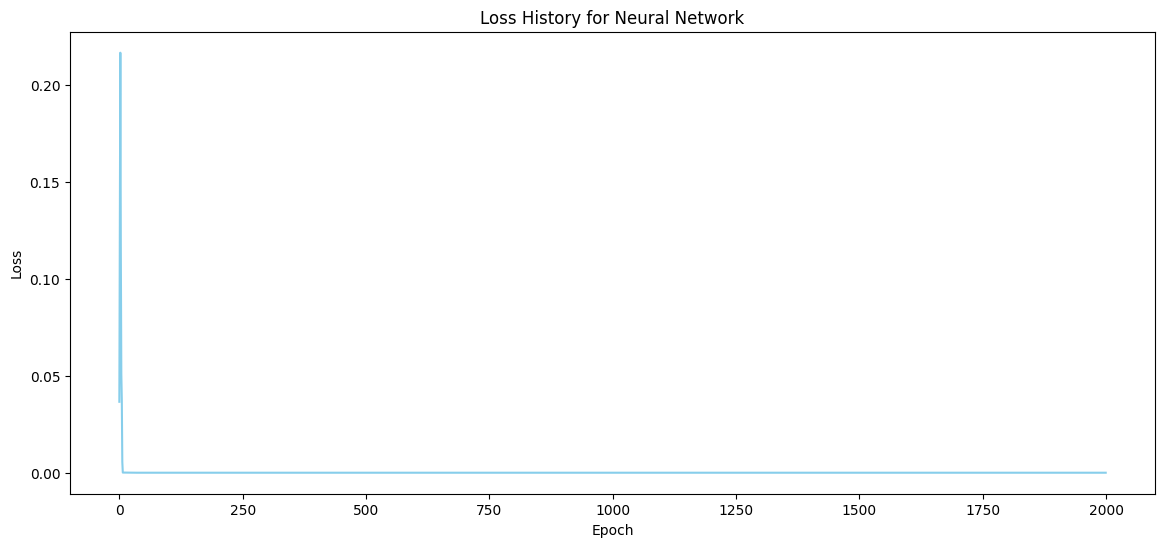

In [ ]:
import matplotlib.pyplot as plt

# Extract loss values
loss_values = [loss.item()/10000 for loss in loss_history]

plt.figure(figsize=(14, 6))
plt.plot(loss_values, color='skyblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History for Neural Network')
plt.show()



In [ ]:
_, predicted_labels = torch.max(outputs, 1)

# Calculate accuracy
correct_predictions = (predicted_labels == y_encoded_tensor).sum().item()
total_samples = y_encoded_tensor.size(0)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 71.99%


References:

Dataset: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

